In [3]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
import numpy as np
import tensorflow as tf

In [4]:
from tensorflow.keras.layers import Dense,Input, Conv2D,MaxPooling2D, Flatten
from tensorflow.keras.models import Model

In [5]:
layer1= Input((28,28,1))
layer2= Conv2D(32,(3,3),activation='relu')(layer1)
layer3=MaxPooling2D()(layer2)
layer4=Conv2D(64,(3,3), activation='relu')(layer3)
layer5=MaxPooling2D()(layer4)
layer6= Flatten()(layer5)
layer7=Dense(64,activation='relu')(layer6)
layer8 = Dense(10,activation='softmax')(layer7)


cnn_model= Model(layer1,layer8)

In [6]:
cnn_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
cnn_model.compile(loss='categorical_crossentropy',metrics=['accuracy'])

In [8]:
from tensorflow.keras.datasets import mnist

In [9]:
(train_x,train_y),(test_x,test_y)=mnist.load_data()

In [10]:
type(train_x)

numpy.ndarray

In [11]:
train_x.shape, train_x.shape, test_x.shape, test_y.shape

((60000, 28, 28), (60000, 28, 28), (10000, 28, 28), (10000,))

<function matplotlib.pyplot.show(close=None, block=None)>

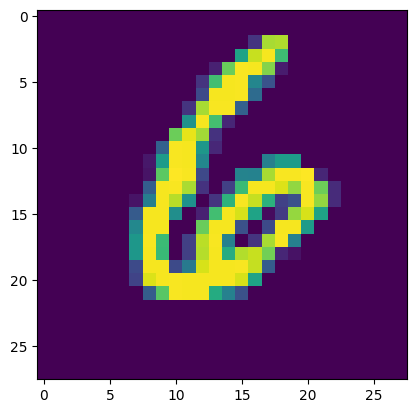

In [12]:
plt.imshow(train_x[13])
plt.show

In [13]:
train_x = train_x.astype('float32')/255.0
test_x = test_x.astype('float32')/255.0


In [14]:
train_x = train_x.reshape(-1,28,28,1)
test_x = test_x.reshape(-1,28,28,1)

In [15]:
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((60000, 28, 28, 1), (60000,), (10000, 28, 28, 1), (10000,))

In [16]:
train_y = to_categorical(train_y,10)
test_y = to_categorical(test_y,10)

In [17]:
h = cnn_model.fit(train_x,train_y,epochs=10, batch_size=128)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.8419 - loss: 0.5116
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9807 - loss: 0.0632
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.9868 - loss: 0.0419
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9904 - loss: 0.0296
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.9918 - loss: 0.0244
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9945 - loss: 0.0183
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9954 - loss: 0.0149
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.9966 - loss: 0.0117
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 38ms/step - accuracy: 0.9971 - loss: 0.0092
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 23s 42ms/step - accuracy: 0.9979 - loss: 0.0067


In [18]:
h.history

{'accuracy': [0.9294000267982483,
  0.9816666841506958,
  0.9873499870300293,
  0.9900166392326355,
  0.9922500252723694,
  0.9939666390419006,
  0.9950833320617676,
  0.9962666630744934,
  0.9968000054359436,
  0.9975333213806152],
 'loss': [0.23012569546699524,
  0.05928869917988777,
  0.04087157920002937,
  0.030744146555662155,
  0.02443249709904194,
  0.01970374770462513,
  0.015468291006982327,
  0.01252665463835001,
  0.01057336013764143,
  0.007918519899249077]}

In [19]:
performance = h.history

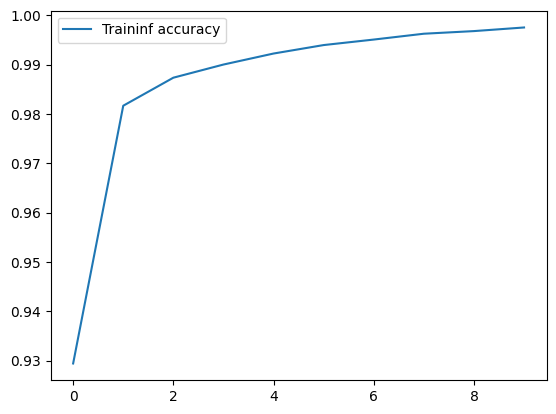

In [20]:
performance= h.history
plt.plot(performance['accuracy'],label='Training accuracy')
plt.legend()


plt.show()

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [22]:
dataaugment= ImageDataGenerator(
    rotation_range=95,
    width_shift_range = 0.4
    
)


In [23]:
dataaugment.fit(train_x)

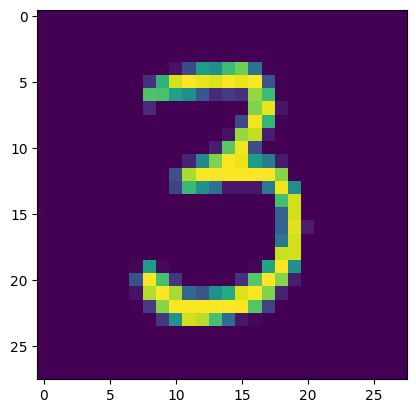

In [24]:
plt.imshow(train_x[50])
plt.show()

In [25]:
layer1= Input((28,28,1))
layer2= Conv2D(32,(3,3),activation='relu')(layer1)
layer3=MaxPooling2D()(layer2)
layer4=Conv2D(64,(3,3), activation='relu')(layer3)
layer5=MaxPooling2D()(layer4)
layer6= Flatten()(layer5)
layer7=Dense(64,activation='relu')(layer6)
layer8 = Dense(10,activation='softmax')(layer7)


cnn_model_augmentation= Model(layer1,layer8)

In [26]:
cnn_model_augmentation.compile(loss='categorical_crossentropy',metrics=['accuracy'])


In [27]:
h2 = cnn_model_augmentation.fit(   
    dataaugment.flow(train_x, train_y, batch_size=64),
    epochs=10, batch_size=128
 )

Epoch 1/10


d:\Users\TERESA\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


938/938 ━━━━━━━━━━━━━━━━━━━━ 59s 60ms/step - accuracy: 0.4805 - loss: 1.4927
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 53s 56ms/step - accuracy: 0.8155 - loss: 0.5722
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 49s 51ms/step - accuracy: 0.8649 - loss: 0.4260
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 50s 53ms/step - accuracy: 0.8825 - loss: 0.3697
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 48s 51ms/step - accuracy: 0.8995 - loss: 0.3200
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 54s 57ms/step - accuracy: 0.9075 - loss: 0.2943
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 52s 55ms/step - accuracy: 0.9137 - loss: 0.2723
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 54s 57ms/step - accuracy: 0.9192 - loss: 0.2589
Epoch 9/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 52s 55ms/step - accuracy: 0.9222 - loss: 0.2459
Epoch 10/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 52s 55ms/step - accuracy: 0.9266 - loss: 0.2318


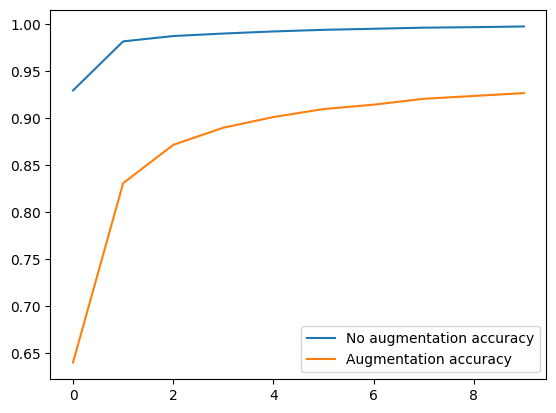

In [28]:
performance2= h2.history
plt.plot(performance['accuracy'],label='No augmentation accuracy')
plt.plot(performance2['accuracy'],label='Augmentation accuracy')
plt.legend()


plt.show()